## Step 1: Import Required Libraries

In [116]:
# Supress warnings
import warnings
warnings.filterwarnings("ignore")

# Importing all libraries required for Dataframe
import numpy as np
import pandas as pd

# Importing all libraries required for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
%matplotlib inline
from pylab import rcParams
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1)

# Importing all libraries required for Clustering
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## Step 2: Reading and Understanding the Data

In [117]:
# Reading Datasets
country = pd.read_csv("Country-data.csv")
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2000,10.0000,7.5800,44.9000,1610,9.4400,56.2000,5.8200,553
1,Albania,16.6000,28.0000,6.5500,48.6000,9930,4.4900,76.3000,1.6500,4090
2,Algeria,27.3000,38.4000,4.1700,31.4000,12900,16.1000,76.5000,2.8900,4460
3,Angola,119.0000,62.3000,2.8500,42.9000,5900,22.4000,60.1000,6.1600,3530
4,Antigua and Barbuda,10.3000,45.5000,6.0300,58.9000,19100,1.4400,76.8000,2.1300,12200


In [118]:
# Reading data dictionary
dictionary = pd.read_csv("data-dictionary+.csv")
dictionary

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services per capita. Given as %age of the GDP per capita
3,health,Total health spending per capita. Given as %age of GDP per capita
4,imports,Imports of goods and services per capita. Given as %age of the GDP per capita
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


### 2.1 Data Inspection

In [119]:
# Checking the number of rows and columns of the dataset
country.shape

(167, 10)

In [120]:
# Checking the basic information of the dataset
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [121]:
# Checking the descriptive statistics of the dataset
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000
mean,38.2701,41.1090,6.8157,46.8902,17144.6886,7.7818,70.5557,2.9480,12964.1557
std,40.3289,27.4120,2.7468,24.2096,19278.0677,10.5707,8.8932,1.5138,18328.7048
min,2.6000,0.1090,1.8100,0.0659,609.0000,-4.2100,32.1000,1.1500,231.0000
25%,8.2500,23.8000,4.9200,30.2000,3355.0000,1.8100,65.3000,1.7950,1330.0000
50%,19.3000,35.0000,6.3200,43.3000,9960.0000,5.3900,73.1000,2.4100,4660.0000
75%,62.1000,51.3500,8.6000,58.7500,22800.0000,10.7500,76.8000,3.8800,14050.0000
max,208.0000,200.0000,17.9000,174.0000,125000.0000,104.0000,82.8000,7.4900,105000.0000


`Insights`:
- Data set is having 167 countries data with 10 features of each.
- From data dictionary, we can see that `exports, health and imports` are given as %age of GDP per capita.

### 2.2 Cleaning Data

In [122]:
# Cheking the missing values in the dataset
country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

`Insight`:
- There are `no missing` values in the dataset.

In [123]:
# Checking the duplicates
country.loc[country.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


`Insight`: 
- There are `no duplicates` values in the dataset.

### 2.3 Data Conversion/Trasformation

We will deduce the 3 variables namely `imports`, `exports` and `health` spending from percentage values to actual values of their GDP per capita since the percentage values don’t give a clear picture of that country. 

**For example**:- Austria and Belarus have almost the same exports % but their gdpp has a huge gap which doesn’t give an accurate idea of which country is more developed than the other.
Then we will remove the Country field and keep it as the row names in the final data frame and scale the remaining data.

In [124]:
#Checking the values before transformation
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2000,10.0000,7.5800,44.9000,1610,9.4400,56.2000,5.8200,553
1,Albania,16.6000,28.0000,6.5500,48.6000,9930,4.4900,76.3000,1.6500,4090
2,Algeria,27.3000,38.4000,4.1700,31.4000,12900,16.1000,76.5000,2.8900,4460
3,Angola,119.0000,62.3000,2.8500,42.9000,5900,22.4000,60.1000,6.1600,3530
4,Antigua and Barbuda,10.3000,45.5000,6.0300,58.9000,19100,1.4400,76.8000,2.1300,12200


In [125]:
# Converting imports, exports and health spending percentages to absolute values
country['imports'] = country['imports'] * country['gdpp']/100
country['exports'] = country['exports'] * country['gdpp']/100
country['health']  = country['health']  * country['gdpp']/100

In [126]:
#Checking the values after transformation
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610,9.4400,56.2000,5.8200,553
1,Albania,16.6000,1145.2000,267.8950,1987.7400,9930,4.4900,76.3000,1.6500,4090
2,Algeria,27.3000,1712.6400,185.9820,1400.4400,12900,16.1000,76.5000,2.8900,4460
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900,22.4000,60.1000,6.1600,3530
4,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100,1.4400,76.8000,2.1300,12200


In [127]:
# Checking the new shape of the dataframe
country.shape

(167, 10)

In [128]:
# Selecting numerical columns and droppig country
# List cols for upper caping
cols = ['exports', 'health', 'imports', 'total_fer','gdpp']
country[cols].describe(percentiles= [0.01,0.25,0.5,0.75,0.99])

,exports,health,imports,total_fer,gdpp
count,167.0000,167.0000,167.0000,167.0000,167.0000
mean,7420.6188,1056.7332,6588.3521,2.9480,12964.1557
std,17973.8858,1801.4089,14710.8104,1.5138,18328.7048
min,1.0769,12.8212,0.6511,1.1500,231.0000
1%,22.2437,17.0094,104.9096,1.2432,331.6200
25%,447.1400,78.5355,640.2150,1.7950,1330.0000
50%,1777.4400,321.8860,2045.5800,2.4100,4660.0000
75%,7278.0000,976.9400,7719.6000,3.8800,14050.0000
99%,64794.2600,8410.3304,55371.3900,6.5636,79088.0000
max,183750.0000,8663.6000,149100.0000,7.4900,105000.0000


## Step 3: Exploratory Data Analytics (EDA)

In [129]:
# Using describe function and Checking outliers at 25%,50%,75%,90%,95% and 99%
country.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000
mean,38.2701,7420.6188,1056.7332,6588.3521,17144.6886,7.7818,70.5557,2.9480,12964.1557
std,40.3289,17973.8858,1801.4089,14710.8104,19278.0677,10.5707,8.8932,1.5138,18328.7048
min,2.6000,1.0769,12.8212,0.6511,609.0000,-4.2100,32.1000,1.1500,231.0000
25%,8.2500,447.1400,78.5355,640.2150,3355.0000,1.8100,65.3000,1.7950,1330.0000
50%,19.3000,1777.4400,321.8860,2045.5800,9960.0000,5.3900,73.1000,2.4100,4660.0000
75%,62.1000,7278.0000,976.9400,7719.6000,22800.0000,10.7500,76.8000,3.8800,14050.0000
90%,100.2200,17760.6000,3825.4160,15034.2800,41220.0000,16.6400,80.4000,5.3220,41840.0000
95%,116.0000,31385.1000,4966.7010,24241.5600,48290.0000,20.8700,81.4000,5.8610,48610.0000
99%,153.4000,64794.2600,8410.3304,55371.3900,84374.0000,41.4780,82.3700,6.5636,79088.0000


### 3.1 Univariate Analysis

We need to choose the countries that are in the direst need of aid. Hence, we need to identify those countries with using some socio-economic and health factors that determine the overall development of the country.

`child_mort`,`gdpp` and `income` are important variables to finalize the financial aid and those are highlited in `orange` color.

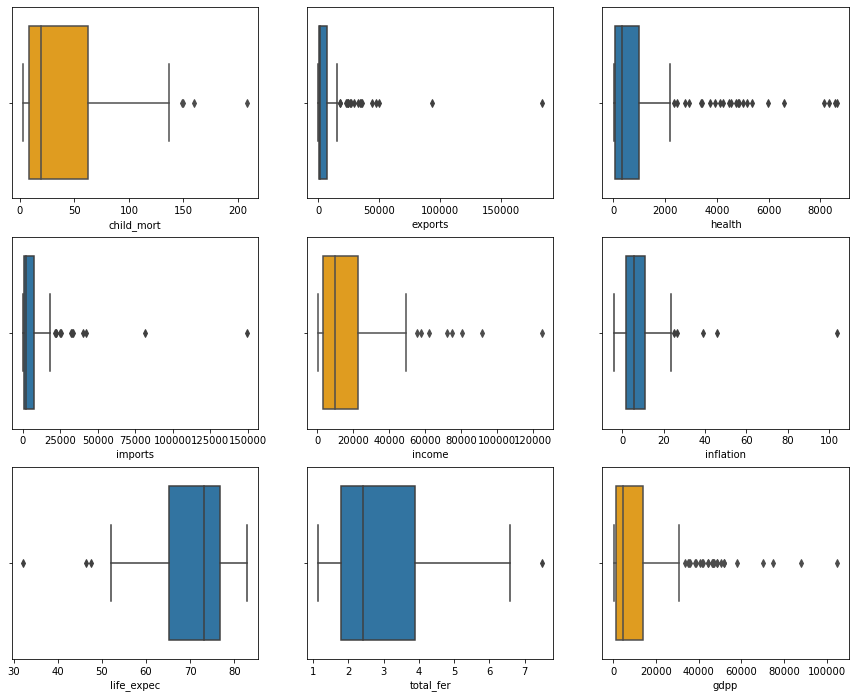

In [130]:
# Cheking the outliers - how values in each columns are distrivuted using boxplot
fig, axs = plt.subplots(3,3, figsize = (15,12))

plt1 = sns.boxplot(country['child_mort'], ax = axs[0,0], color = 'orange')
plt2 = sns.boxplot(country['exports'], ax = axs[0,1])
plt3 = sns.boxplot(country['health'], ax = axs[0,2])
plt4 = sns.boxplot(country['imports'], ax = axs[1,0])
plt5 = sns.boxplot(country['income'], ax = axs[1,1], color = 'orange')
plt6 = sns.boxplot(country['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(country['life_expec'], ax = axs[2,0])
plt8 = sns.boxplot(country['total_fer'], ax = axs[2,1])
plt9 = sns.boxplot(country['gdpp'], ax = axs[2,2], color = 'orange')

plt.show()

`Insight`: 

We observe the following about the outliers:
- Since we have limited number of countries(167), removing these outliers would shrink the data and the under-developed countries which are in actual dire need may not contribute to the dataset.
- So we will cap them to upper and lower limit. But simply capping them to `Upper and Lower Hinge` of box plot may shift the `cluster centroid`.
- So considering all the sinario we would cap the extreme values in the outliers to `0.01 and 0.99` percentile. By doing this we will be avoiding the risk of cluster overlapping.
- There are some exclusions while doing outlier treatment.
    - `child_mort`, `inflation`: High Child mortality  and higher inflation are our matter of concern so we will not do uppercapping for these features.
    - `export`, `health`, `imports`, `total_fer` and `gdpp` : It has outlier at higher level. We will impute outlier to upper capping (0.99 percentile)
    - `life_expec` : It has outlers bellow the lower hinge, But again it is our matter of concern so we will not impute these values.
      
      
- There are very few oultiers (<= 5) for all variables except for income and gdpp.
- All variables have outliers on the upper side (higher values) except for life_expec which has outliers on the down side (less values) indicating that usually the life expectancy in most countries is above 50 except for 3 countries.

**Top 10 poor countries** : Selected the top 10 poor countries to check, how the variables are affected.

In [131]:
country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

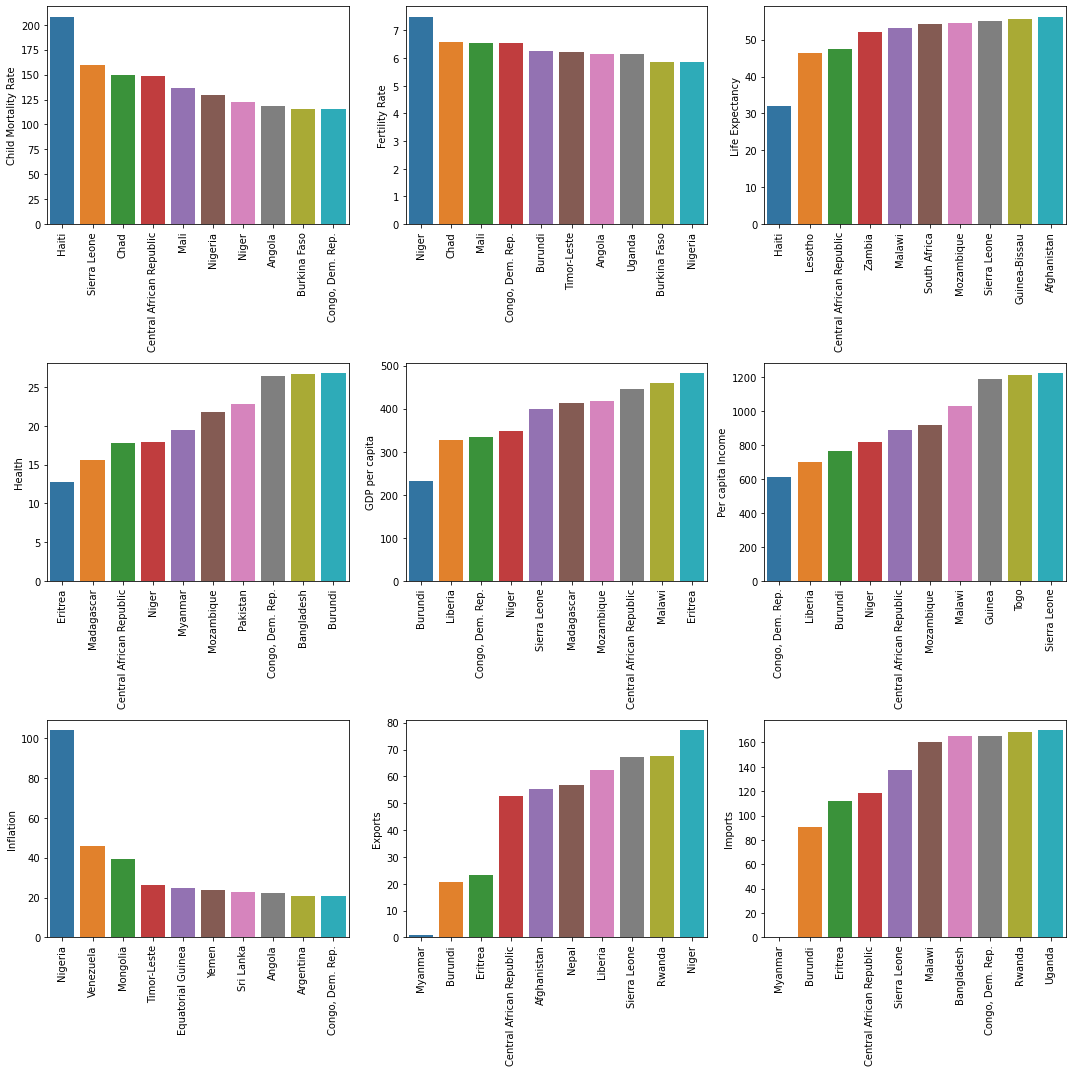

In [132]:
fig, axs = plt.subplots(3,3,figsize = (15,15))

# poor top 10 countries represented as `pt10`

# Child Mortality Rate 
pt10_child_mort = country[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='child_mort', data= pt10_child_mort, ax = axs[0,0])
plt1.set(xlabel = '', ylabel= 'Child Mortality Rate')

# Exports
pt10_exports = country[['country','exports']].sort_values('exports', ascending = True).head(10)
plt2 = sns.barplot(x='country', y='exports', data= pt10_exports, ax = axs[2,1])
plt2.set(xlabel = '', ylabel= 'Exports')

# Health 
pt10_health = country[['country','health']].sort_values('health', ascending = True).head(10)
plt3 = sns.barplot(x='country', y='health', data= pt10_health, ax = axs[1,0])
plt3.set(xlabel = '', ylabel= 'Health')

# Imports
pt10_imports = country[['country','imports']].sort_values('imports', ascending = True).head(10)
plt4 = sns.barplot(x='country', y='imports', data= pt10_imports, ax = axs[2,2])
plt4.set(xlabel = '', ylabel= 'Imports')

# Per capita Income 
pt10_income = country[['country','income']].sort_values('income', ascending = True).head(10)
plt5 = sns.barplot(x='country', y='income', data= pt10_income, ax = axs[1,2])
plt5.set(xlabel = '', ylabel= 'Per capita Income')

# Inflation
pt10_inflation = country[['country','inflation']].sort_values('inflation', ascending = False).head(10)
plt6 = sns.barplot(x='country', y='inflation', data= pt10_inflation, ax = axs[2,0])
plt6.set(xlabel = '', ylabel= 'Inflation')

# Fertility Rate
pt10_total_fer = country[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
plt7 = sns.barplot(x='country', y='total_fer', data= pt10_total_fer, ax = axs[0,1])
plt7.set(xlabel = '', ylabel= 'Fertility Rate')

# Life Expectancy
pt10_life_expec = country[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
plt8 = sns.barplot(x='country', y='life_expec', data= pt10_life_expec, ax = axs[0,2])
plt8.set(xlabel = '', ylabel= 'Life Expectancy')

# The GDP per capita 
pt10_gdpp = country[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
plt9 = sns.barplot(x='country', y='gdpp', data= pt10_gdpp, ax = axs[1,1])
plt9.set(xlabel = '', ylabel= 'GDP per capita')


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.show()

Insight: 

- From above bar plot we could see the below common countires in the profile of `gdpp`, `child_mort` and `income` which are: `Congo, Dem. Rep.`, `Niger`, `Sierra Leone`,`Central African Republic`.

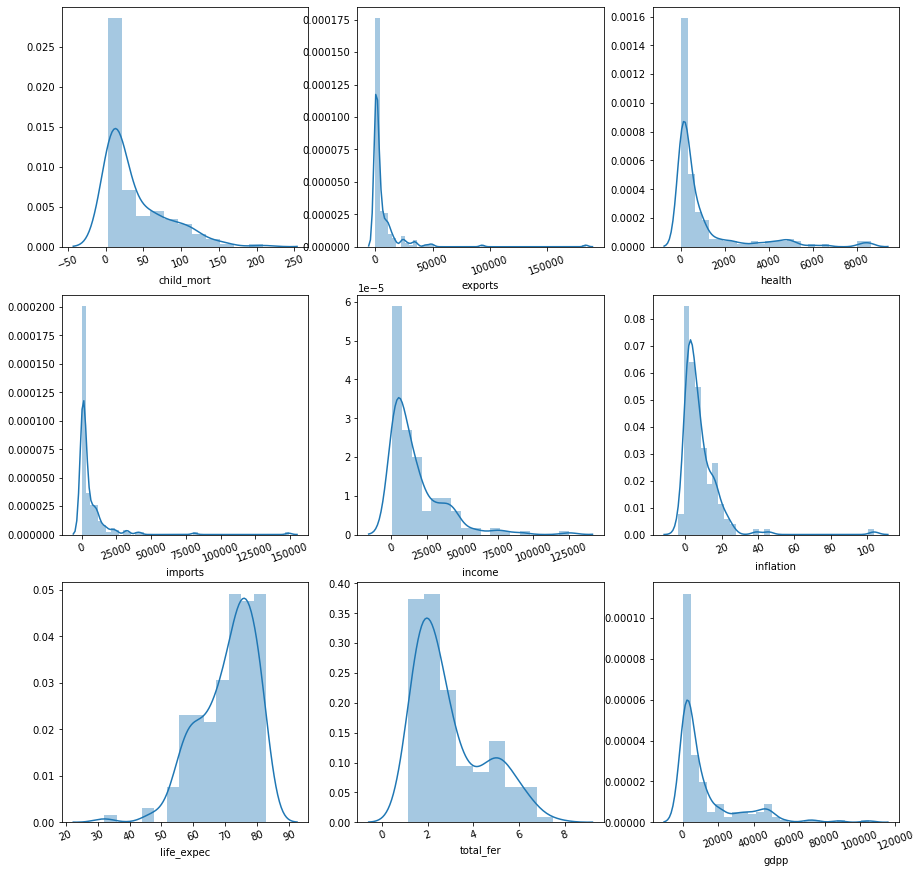

In [133]:
# Distribution Plot
plt.figure(figsize=(15, 15))
features = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(features):
    ax = plt.subplot(3, 3, i[0]+1)
    sns.distplot(country[i[1]])
    plt.xticks(rotation=20)

`Insight`:
- `life_expec` is right skewed and all other features are leftskewed.

### 3.2 Bivariate analysis

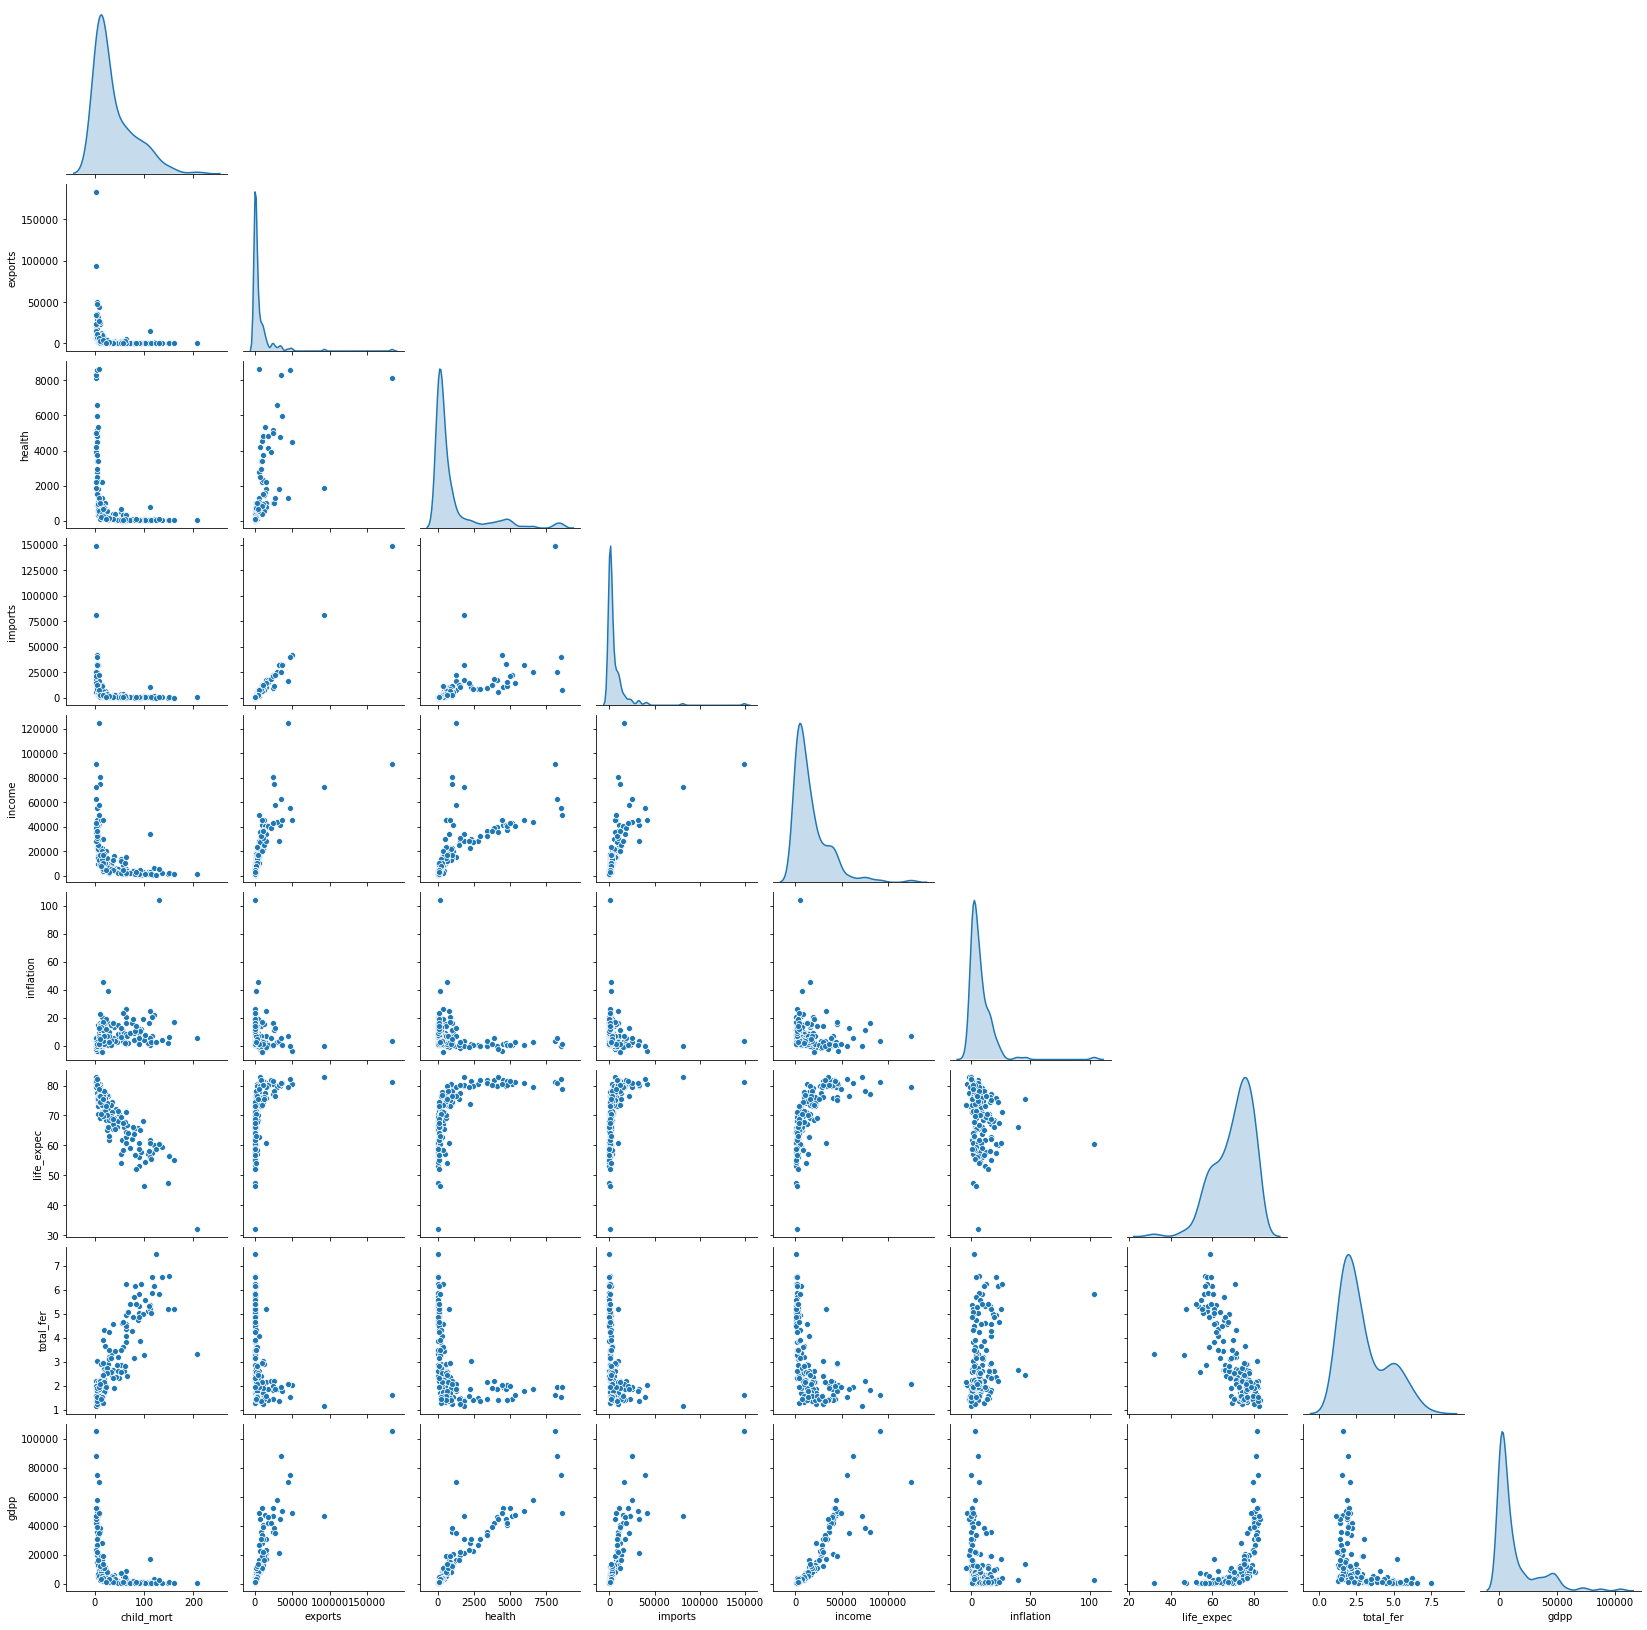

In [134]:
# pairplot for continuous data type
sns.pairplot(country.select_dtypes(['int64','float64']), diag_kind='kde', corner=True)
plt.show()

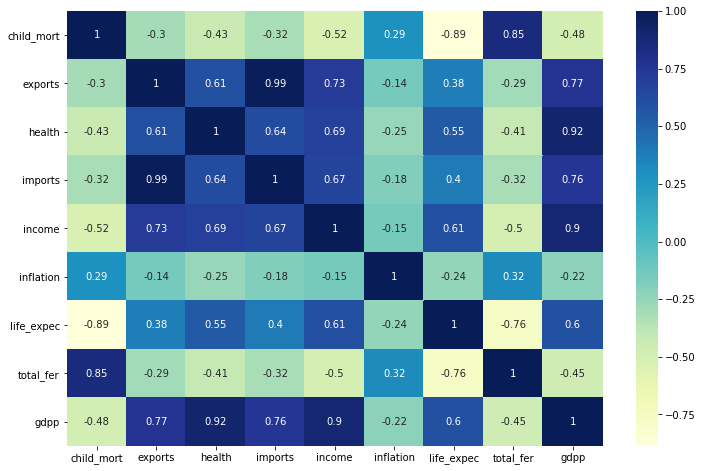

In [135]:
# Corrleation of the df dataset
plt.figure(figsize= (12,8))
sns.heatmap(country.corr(), annot = True, cmap = "YlGnBu")
plt.show()

`Insights`:

We observe the following correlations from the plot:

- Most of the data points are 'Not Normally' distributed.
- From pairplot and heatmap we could observe that there are features with high correations:
    - gdpp and income are most highly correlated with correlation value of `0.9`.
    - child_mortality and life_expentency are highly correlated with correlation value of `-0.89`.
    - child_mortality and total_fertility are highly correlated with correlation value of `0.85`.
    - imports and exports are highly correlated with correlation value of `0.74`.
    - life_expentency and total_fertility are highly correlated with correlation value of `-0.76`.

### 3.3 Outlier Treatment

- `child_mort`: It has outliers beyond higher boundary. But we will not do any imputation as we are concernened about the higher child_mort.
- `export`, `helath`, `imports`, `total_fer` and `gdpp` : It has outliers beyond higher boundary. We will impute outliers to upper capping of (0.99 percentile).
- `life_expec` : It has outliers below the lower boundary. But we are intersted on these values so we will not impute these values.

In [136]:
# Selecting the numerical columns and dropping the country
country1 = country.drop('country', axis =1)

In [137]:
# List cols for upper caping and get insigts of data
cols = ['exports', 'health', 'imports', 'total_fer','gdpp']
country1[cols].describe(percentiles= [0.01,0.25,0.5,0.75,0.99])

,exports,health,imports,total_fer,gdpp
count,167.0000,167.0000,167.0000,167.0000,167.0000
mean,7420.6188,1056.7332,6588.3521,2.9480,12964.1557
std,17973.8858,1801.4089,14710.8104,1.5138,18328.7048
min,1.0769,12.8212,0.6511,1.1500,231.0000
1%,22.2437,17.0094,104.9096,1.2432,331.6200
25%,447.1400,78.5355,640.2150,1.7950,1330.0000
50%,1777.4400,321.8860,2045.5800,2.4100,4660.0000
75%,7278.0000,976.9400,7719.6000,3.8800,14050.0000
99%,64794.2600,8410.3304,55371.3900,6.5636,79088.0000
max,183750.0000,8663.6000,149100.0000,7.4900,105000.0000


In [138]:
# upper caping
cap = 0.99
for col in cols:
    HL = round(country1[col].quantile(cap),2)
    country1[col] = country1[col].apply(lambda x: HL if x>HL else x)

In [139]:
# Descriptive statistics after capping
country1[cols].describe(percentiles= [0.01,0.25,0.5,0.75,0.99])

,exports,health,imports,total_fer,gdpp
count,167.0000,167.0000,167.0000,167.0000,167.0000
mean,6538.2148,1054.2066,5873.1352,2.9422,12756.8263
std,11415.3086,1790.8453,9422.7009,1.4982,17430.2089
min,1.0769,12.8212,0.6511,1.1500,231.0000
1%,22.2437,17.0094,104.9096,1.2432,331.6200
25%,447.1400,78.5355,640.2150,1.7950,1330.0000
50%,1777.4400,321.8860,2045.5800,2.4100,4660.0000
75%,7278.0000,976.9400,7719.6000,3.8800,14050.0000
99%,55136.3084,8352.9826,46629.1026,6.5534,76125.9200
max,64794.2600,8410.3300,55371.3900,6.5600,79088.0000


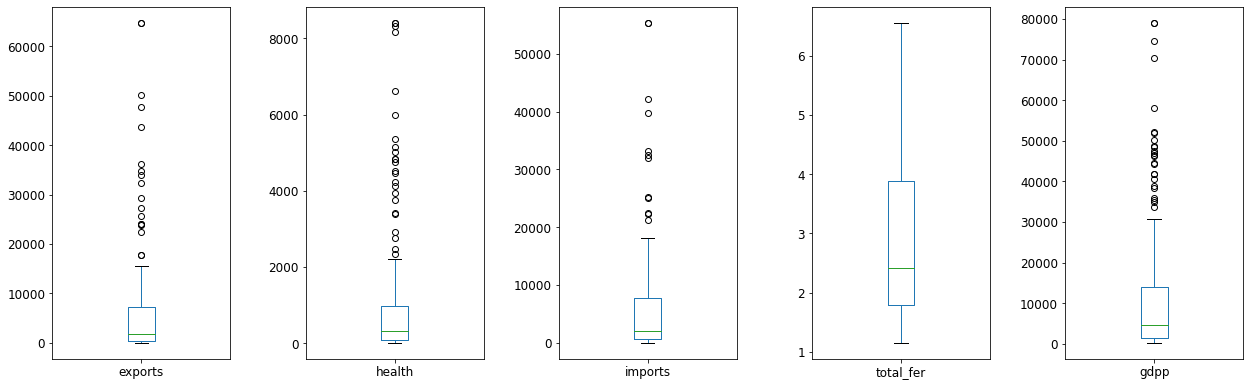

In [140]:
# check outliers after capping
country1[cols].plot.box(subplots = True, figsize = (18,6), fontsize = 12)
plt.tight_layout(pad=3)
plt.show()

`Insights`: 
- There are still some outliers which exists but, we choose to keep them and proceed for modeling.

## Step 4: Feature Scaling

In [141]:
# dataset columns
country1.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [142]:
# Create a scaling object
scaler = MinMaxScaler()

# fit_transform
df_scaled = scaler.fit_transform(country1)
df_scaled.shape

(167, 9)

In [143]:
df_scaled

array([[4.26484907e-01, 8.36863963e-04, 3.46486091e-03, ...,
        4.75345168e-01, 8.63216266e-01, 4.08334073e-03],
       [6.81596884e-02, 1.76580780e-02, 3.03749369e-02, ...,
        8.71794872e-01, 9.24214418e-02, 4.89366829e-02],
       [1.20253165e-01, 2.64157894e-02, 2.06204964e-02, ...,
        8.75739645e-01, 3.21626617e-01, 5.36287203e-02],
       ...,
       [1.00778968e-01, 1.45404661e-02, 9.14352123e-03, ...,
        8.08678501e-01, 1.47874307e-01, 1.36829958e-02],
       [2.61441091e-01, 6.04883201e-03, 6.55394371e-03, ...,
        6.98224852e-01, 6.50646950e-01, 1.36829958e-02],
       [3.91918208e-01, 8.32067595e-03, 8.71363183e-03, ...,
        3.92504931e-01, 7.85582255e-01, 1.55851732e-02]])

## Step 5: Hopkins Statistics

Before we apply any clustering algorithm to the given data, it's important to check whether the given data has some meaningful clusters or not? which in general means the given data is not random. The process to evaluate the data to check if the data is feasible for clustering or not is know as the clustering tendency. To check cluster tendency, we use Hopkins test. Hopkins test examines whether data points differ significantly from uniformly distributed data in the multidimensional space.
- If the value is between {0.01, ...,0.3}, the data is regularly spaced.
- If the value is around 0.5, it is random.
- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [144]:
# function Hopkin statistics

from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [145]:
# Create dataframe of sclaled fetaures
df_scaled = pd.DataFrame(df_scaled, columns = country1.columns)

# Evaluate Hopkins Statistics
print('Hopkins statistics is: ', round(hopkins(df_scaled),2))

Hopkins statistics is:  0.93


`Insight`: 
- Hopkins Statistic over `0.7` is a good score and it indicates that the data is good for cluster analysis. 

## Step 6: Clustering

### 6.1 K-Means Clustering

K-means is a type of unsupervised learning which is considered as one of the most used algorithms due to its simplicity. To process the learning data, the K-means algorithm in data mining starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids. The ‘means’ in the K-means refers to averaging of the data; that is finding the centroid.

**6.1.1 Run K-Means and choose K using both Elbow and Silhouette score**

**A. Sum of the Sqaured Distance Matrix (SSD)or (Elbow curve)**: In Elbow Curve method, the total within-cluster sum of square measures the compactness of the clustering and it should be as small as possible for better clustering results.

In [146]:
# Cheking the dataframe
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.4265,0.0008,0.0035,0.0045,0.0080,0.1261,0.4753,0.8632,0.0041
1,0.0682,0.0177,0.0304,0.0359,0.0749,0.0804,0.8718,0.0924,0.0489
2,0.1203,0.0264,0.0206,0.0253,0.0988,0.1877,0.8757,0.3216,0.0536
3,0.5667,0.0339,0.0105,0.0273,0.0425,0.2459,0.5523,0.9261,0.0418
4,0.0375,0.0857,0.0861,0.1298,0.1487,0.0522,0.8817,0.1811,0.1518


In [147]:
# Checking the shape of the dataframe
df_scaled.shape

(167, 9)

In [148]:
# Creating list of clusters for no: of clusters
num_clusers = list(range(1,11))
ssd = []
for clustuer in num_clusers:
    kmeans = KMeans(n_clusters=clustuer, max_iter= 50)
    kmeans.fit(df_scaled)
    ssd.append(kmeans.inertia_)

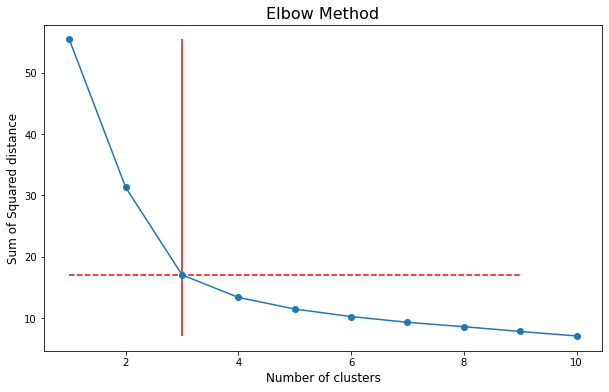

In [149]:
# Plotting the elbow method plot
plt.figure(figsize=(10,6))
plt.plot(num_clusers,ssd, marker = 'o')
plt.title('Elbow Method', fontsize = 16)
plt.xlabel('Number of clusters',fontsize=12)
plt.ylabel('Sum of Squared distance',fontsize=12)
plt.vlines(x=3, ymax=ssd[-1], ymin=ssd[0], colors="r", linestyles="-")
plt.hlines(y=ssd[2], xmax=9, xmin=1, colors="r", linestyles="--")

plt.show()

**B. Silhouette Analysis** : The average silhouette approach measures the quality of a clustering. That is, it determines how well each object lies within its cluster. A high average silhouette width indicates a good clustering.

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of it (inter-cluster)

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster.

* A score closer to 0 indicates that the data point is not in the cluster.

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

For n_clusters=2, the silhouette score is 0.4724
For n_clusters=3, the silhouette score is 0.4838
For n_clusters=4, the silhouette score is 0.4604
For n_clusters=5, the silhouette score is 0.3558
For n_clusters=6, the silhouette score is 0.3402
For n_clusters=7, the silhouette score is 0.3316
For n_clusters=8, the silhouette score is 0.2971
For n_clusters=9, the silhouette score is 0.299
For n_clusters=10, the silhouette score is 0.3037


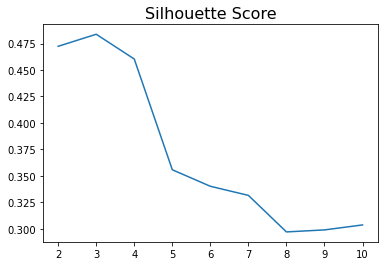

In [150]:
# silhouette analysis
num_clusters = list(range(2,11))
ss = []
for cluster in num_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters= cluster, max_iter=50)
    kmeans.fit(df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = round(silhouette_score(df_scaled, cluster_labels),4)
    ss.append(silhouette_avg)
    print("For n_clusters={0}, the silhouette score is {1}".format(cluster, silhouette_avg))


plt.plot(num_clusters,pd.DataFrame(ss)[0])
plt.title('Silhouette Score', fontsize = 16)
plt.show()

`Insight`: 
- The maximum silhouette score is at `cluster 3`.
- There is less reduction in sum of squared distance after `cluster 3` in elbow method.

From the above two methods we would choose `3 clusters` as optimal number.

**6.1.2 Run K-Means with the chosen K**

Choosing the model from the above results, we could see that using 3 Clusters provided a better output in terms of a balanced cluster size. So we will consider the '`K-Means with 3 Clusters` as our FINAL MODEL.

In [151]:
# K-Mean with k =3
kmeans = KMeans(n_clusters = 3, max_iter = 50, random_state= 50)
kmeans.fit(df_scaled)

KMeans(max_iter=50, n_clusters=3, random_state=50)

In [152]:
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

- First we need to assign the Cluster IDs that we generated to each of the datapoints that we have with us.

In [153]:
#adding produced labels dataframe
df_country = country.copy()
df_country['KMean_clusterid']= pd.Series(kmeans.labels_)
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMean_clusterid
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610,9.4400,56.2000,5.8200,553,2
1,Albania,16.6000,1145.2000,267.8950,1987.7400,9930,4.4900,76.3000,1.6500,4090,0
2,Algeria,27.3000,1712.6400,185.9820,1400.4400,12900,16.1000,76.5000,2.8900,4460,0
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900,22.4000,60.1000,6.1600,3530,2
4,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100,1.4400,76.8000,2.1300,12200,0


In [154]:
# Checking the no of countries in each cluster
df_country.KMean_clusterid.value_counts()

0    93
2    46
1    28
Name: KMean_clusterid, dtype: int64

**6.1.3 Visualisation and Cluster Analysis (K Mean Cluster)**

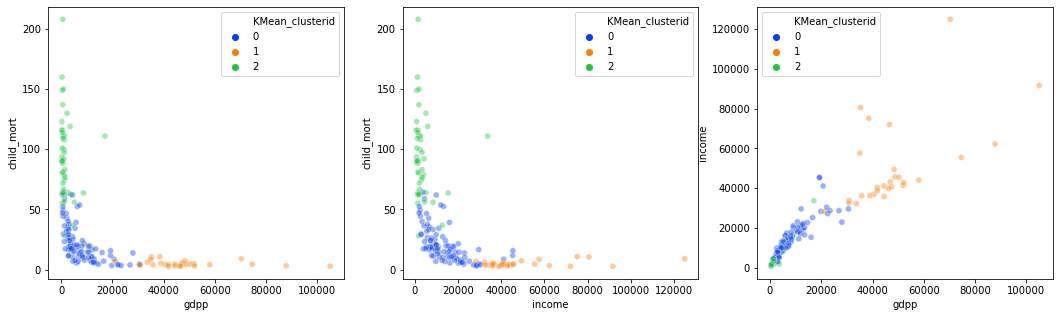

In [156]:
# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='KMean_clusterid', data=df_country, palette="bright", alpha=.4)

plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='KMean_clusterid',data=df_country, palette="bright", alpha=.4)

plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='KMean_clusterid', data=df_country, palette="bright", alpha=.4)

plt.show()

- From above graphs, we can say that clusters are clearly visible.

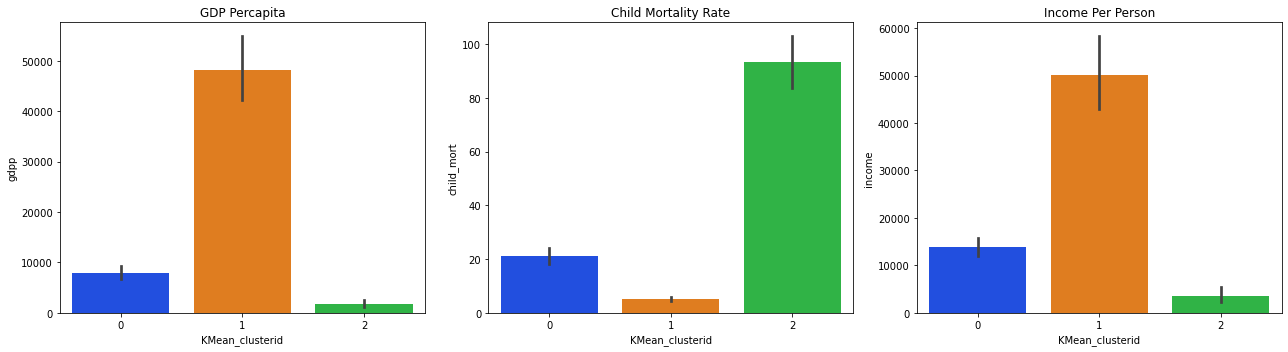

In [157]:
# visualising clusters
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.barplot(x = 'KMean_clusterid', y = 'gdpp', data=df_country, palette="bright")
plt.title('GDP Percapita')

plt.subplot(1,3,2)
sns.barplot(x = 'KMean_clusterid', y = 'child_mort', data=df_country, palette="bright")
plt.title('Child Mortality Rate')

plt.subplot(1,3,3)
sns.barplot(x = 'KMean_clusterid', y = 'income', data=df_country, palette="bright")
plt.title('Income Per Person')

plt.tight_layout()

plt.show()

`INSIGHT`: 
- It's clearly showing that the `cluster 2` is having highest Child Mortality and lowest Income & GDPP and comes under undeveloped countries.

**6.1.4 Clustering profiling using “gdpp, child_mort and income”**

In [158]:
# Cheking the cluster means
df_country.groupby(['KMean_clusterid']).mean().sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
KMean_clusterid,,,,,,,,,
2,93.2848,811.8341,94.2079,748.8068,3516.8043,12.0971,59.3935,5.0902,1695.9130
0,21.0613,3578.7987,548.1754,3687.1279,13939.6774,7.0827,73.0785,2.2458,7954.8602
1,5.0464,31038.2393,4327.1632,25818.1000,50178.5714,3.0147,80.5143,1.7607,48114.2857


In [159]:
# New dataframe for group by & analysis
df_country_analysis =  df_country.groupby(['KMean_clusterid']).mean().sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])
df_country_analysis

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
KMean_clusterid,,,,,,,,,
2,93.2848,811.8341,94.2079,748.8068,3516.8043,12.0971,59.3935,5.0902,1695.9130
0,21.0613,3578.7987,548.1754,3687.1279,13939.6774,7.0827,73.0785,2.2458,7954.8602
1,5.0464,31038.2393,4327.1632,25818.1000,50178.5714,3.0147,80.5143,1.7607,48114.2857


`INSIGHT`: 

The mean of `gdpp, child_mort and income` shows that there is good inter cluster distance.

From  the mean of clusters we could see that,
- Cluster 0 : Developing
- Cluster 1 : Developed
- Cluster 2 : Undeveloped

We are intrested on cluster 2 in KMean Clusters.

In [160]:
# Creating a new field for count of observations in each cluster
df_country_analysis['Observations']=df_country[['KMean_clusterid','child_mort']].groupby(['KMean_clusterid']).count()
df_country_analysis

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Observations
KMean_clusterid,,,,,,,,,,
2,93.2848,811.8341,94.2079,748.8068,3516.8043,12.0971,59.3935,5.0902,1695.9130,46
0,21.0613,3578.7987,548.1754,3687.1279,13939.6774,7.0827,73.0785,2.2458,7954.8602,93
1,5.0464,31038.2393,4327.1632,25818.1000,50178.5714,3.0147,80.5143,1.7607,48114.2857,28


In [161]:
# Creating a new field for proportion of observations in each cluster
df_country_analysis['Proportion']=round(df_country_analysis['Observations']/df_country_analysis['Observations'].sum(),2)


#Summary View
df_country_analysis[['child_mort','income','gdpp','Observations','Proportion']]

,child_mort,income,gdpp,Observations,Proportion
KMean_clusterid,,,,,
2,93.2848,3516.8043,1695.9130,46,0.2800
0,21.0613,13939.6774,7954.8602,93,0.5600
1,5.0464,50178.5714,48114.2857,28,0.1700


<Figure size 1080x720 with 0 Axes>

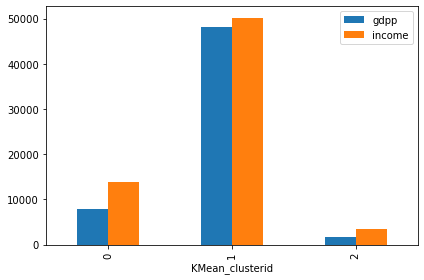

In [162]:
# Plot1 between income and gdpp against cluster_lables3
plt.figure (figsize = (15,10))

df_country_plot1 = df_country[['KMean_clusterid', 'gdpp', 'income']].copy()
df_country_plot1 = df_country_plot1.groupby('KMean_clusterid').mean()
df_country_plot1.plot.bar()

plt.tight_layout()
plt.show()

<Figure size 1080x720 with 0 Axes>

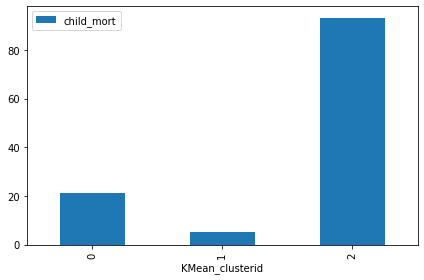

In [163]:
# Plot 2 between child_mort and cluster_labels

plt.figure (figsize = (15,10))

df_country_plot2 = df_country[['KMean_clusterid', 'child_mort']].copy()
df_country_plot2 = df_country_plot2.groupby('KMean_clusterid').mean()
df_country_plot2.plot.bar()

plt.tight_layout()
plt.show()

`Interpretation of Clusters`: 
- Cluster 2 has the Highest Average Child Mortality rate of ~92 when compared to other clusters, and Lowest average GDPP & Income of ~ 1909 & 3897 respectively. 
- All these figures clearly makes this cluster the best candidate for the financial aid from NGO. We could also see that Cluster 2 comprises of ~29% of overall data, and has ~48 observations in comparision to 167 total observations.

In [164]:
# Sort based on 'child_mort','income','gdpp' in respective order
K_cluster_Undeveloped = df_country[df_country['KMean_clusterid']== 2]
K_top5 = K_cluster_Undeveloped.sort_values(by = ['gdpp','income','child_mort'],
                                                     ascending=[True, True, False]).head(5)

print( 'Top 5 countries dire need of aid  based on K cluster are:' , K_top5['country'].values )

Top 5 countries dire need of aid  based on K cluster are: ['Burundi' 'Liberia' 'Congo, Dem. Rep.' 'Niger' 'Sierra Leone']


`Insights`:
- Top 5 countries dire need of aid  based on K cluster are: 
    1. `'Burundi'` 
    2. `'Liberia'`
    3. `'Congo, Dem. Rep.'` 
    4. `'Niger'`
    5. `'Sierra Leone'`

### 6.2 Hierarchical Clustering

Hierarchical clustering is an unsupervised learning technique that groups data over a variety of scales by creating a cluster tree or dendrogram. The tree is not a single set of clusters, but rather a multilevel hierarchy, where clusters at one level are joined as clusters at the next level.

We will use Hierarchical Clustering to identify appropriate cluster size with a good split of data (Max Intra-Cluster distance & Min Inter-Cluster Distance). We will perform Hierarchical Clustering using methods single linkage, complete linkage and ward and then select the one method which yields the best results.

In [165]:
# New dataset check
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.4265,0.0008,0.0035,0.0045,0.0080,0.1261,0.4753,0.8632,0.0041
1,0.0682,0.0177,0.0304,0.0359,0.0749,0.0804,0.8718,0.0924,0.0489
2,0.1203,0.0264,0.0206,0.0253,0.0988,0.1877,0.8757,0.3216,0.0536
3,0.5667,0.0339,0.0105,0.0273,0.0425,0.2459,0.5523,0.9261,0.0418
4,0.0375,0.0857,0.0861,0.1298,0.1487,0.0522,0.8817,0.1811,0.1518


**6.2.1 Use both Single and Complete linkage**

**A. <font color = brown> Single Linkage:<font>** Here, the distance between 2 clusters is defined as the `shortest` distance between points in the two clusters.

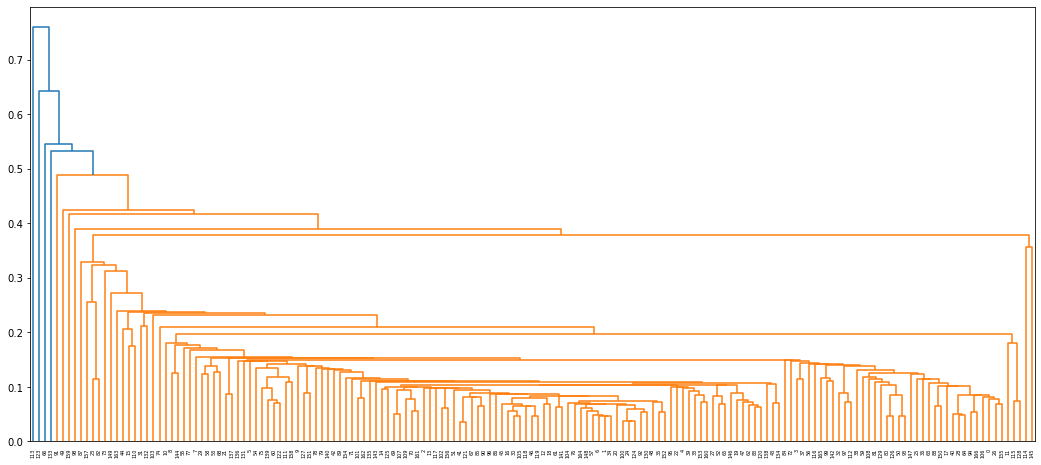

In [166]:
# Utilise the single linkage method for clustering this dataset 
plt.figure(figsize = (18,8))
mergings = linkage(df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

`Insights`:

- The clusters of the single linkage are not truly satisfying. The single linkage method appears to be placing each outlier in its own cluster.

- As you can clearly see, single linkage doesn't produce a good enough result for us to analyse the clusters. Hence, we need to go ahead and utilise the complete linkage method and then analyse the clusters once again.

**B. <font color = brown> Complete Linkage:<font>** Here, the distance between 2 clusters is defined as the `maximum` distance between points in the two clusters.

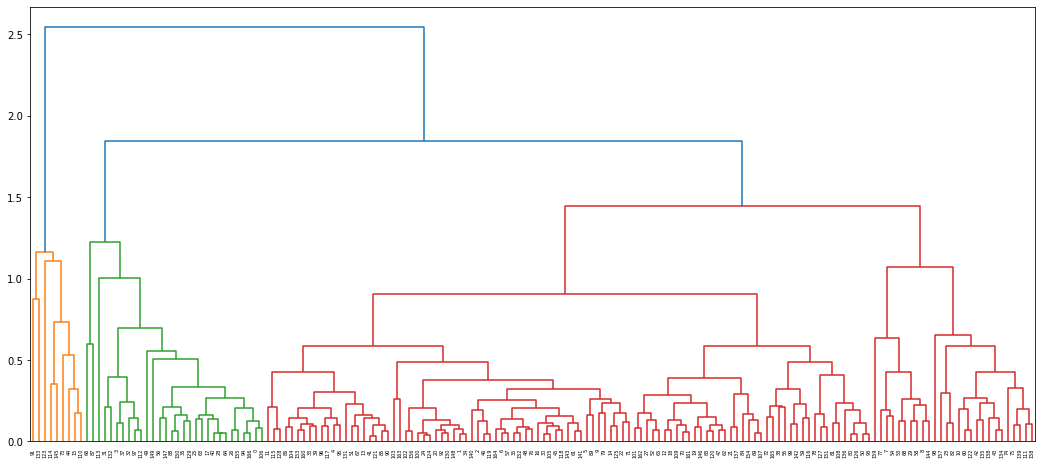

In [167]:
# Utilise the complete linkage method for clustering this dataset.
plt.figure(figsize = (18,8))
mergings = linkage(df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

`Insights`:
- From the above Dendrograms, it is evident that 'Complete Linkage' give a better cluster formation. 
- So we will use Complete linkage output for our further analysis.
- We will build two iterations of clustering with 3 & 4 clusters and analyse the output.

**6.2.2 Choose one method based on the results**

In [169]:
# Creating the labels
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       2, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [170]:
# assign cluster labels
#df_country = df.copy()
df_country['H_ClusterID'] = pd.Series(cluster_labels)
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMean_clusterid,H_ClusterID
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610,9.4400,56.2000,5.8200,553,2,0
1,Albania,16.6000,1145.2000,267.8950,1987.7400,9930,4.4900,76.3000,1.6500,4090,0,1
2,Algeria,27.3000,1712.6400,185.9820,1400.4400,12900,16.1000,76.5000,2.8900,4460,0,1
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900,22.4000,60.1000,6.1600,3530,2,0
4,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100,1.4400,76.8000,2.1300,12200,0,1


**6.2.3 Visualise the clusters**

In [171]:
# Cheking the new dataframe shape
df_country.shape

(167, 12)

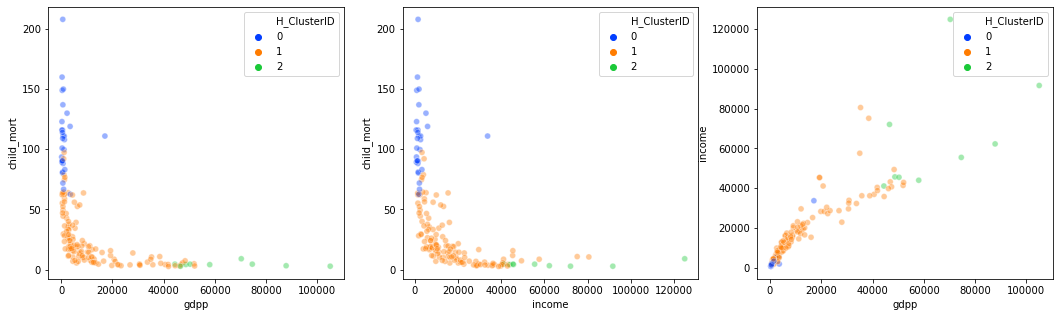

In [172]:
# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='H_ClusterID', data=df_country, palette="bright", alpha=.4)

plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='H_ClusterID',data=df_country, palette="bright", alpha=.4)

plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='H_ClusterID', data=df_country, palette="bright", alpha=.4)

plt.show()

- From above graphs, we can say that clusters are clearly visible.

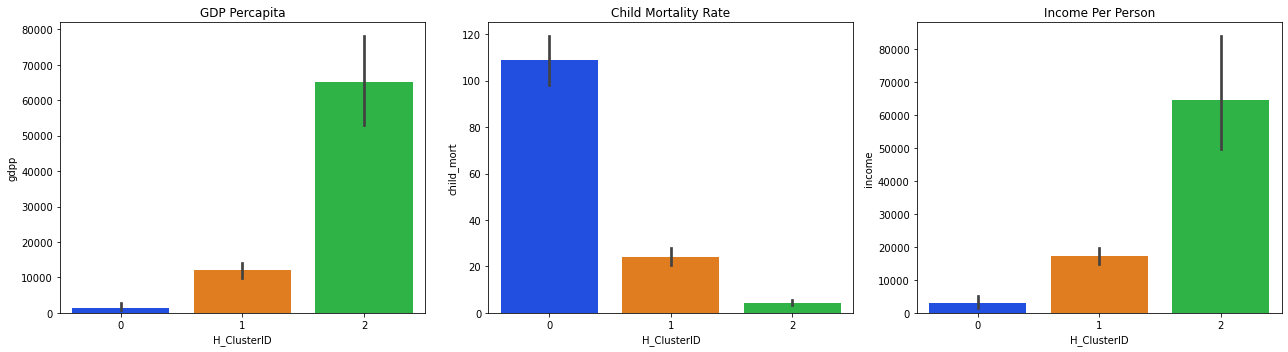

In [173]:
# Visualising clusters
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.barplot(x = 'H_ClusterID', y = 'gdpp', data=df_country, palette="bright")
plt.title('GDP Percapita')

plt.subplot(1,3,2)
sns.barplot(x = 'H_ClusterID', y = 'child_mort', data=df_country, palette="bright")
plt.title('Child Mortality Rate')

plt.subplot(1,3,3)
sns.barplot(x = 'H_ClusterID', y = 'income', data=df_country, palette="bright")
plt.title('Income Per Person')

plt.tight_layout()
plt.show()

`INSIGHT`: 
- It's clearly showing that the `cluster 0` having highest Child Mortality and lowest Income & GDPP and its comes under undevloped conutries.

In [174]:
# Cheking the cluster count
df_country.H_ClusterID.value_counts()

1    128
0    30 
2    9  
Name: H_ClusterID, dtype: int64

In [175]:
# Checking the countries in Cluster 2 to see which are the countries in that segment.
cluster_2 = df_country[df_country['H_ClusterID']==2]
cluster_2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMean_clusterid,H_ClusterID
15,Belgium,4.5000,33921.6000,4750.8000,33166.8000,41100,1.8800,80.0000,1.8600,44400,1,2
44,Denmark,4.1000,29290.0000,6612.0000,25288.0000,44000,3.2200,79.5000,1.8700,58000,1,2
73,Ireland,4.2000,50161.0000,4475.5300,42125.5000,45700,-3.2200,80.4000,2.0500,48700,1,2
91,Luxembourg,2.8000,183750.0000,8158.5000,149100.0000,91700,3.6200,81.3000,1.6300,105000,1,2
110,Netherlands,4.5000,36216.0000,5985.7000,31990.8000,45500,0.8480,80.7000,1.7900,50300,1,2


In [176]:
# Checking the countries in Cluster 1 to see which are the countries in that segment.
cluster_1 = df_country[df_country['H_ClusterID']== 1]
cluster_1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMean_clusterid,H_ClusterID
1,Albania,16.6000,1145.2000,267.8950,1987.7400,9930,4.4900,76.3000,1.6500,4090,0,1
2,Algeria,27.3000,1712.6400,185.9820,1400.4400,12900,16.1000,76.5000,2.8900,4460,0,1
4,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100,1.4400,76.8000,2.1300,12200,0,1
5,Argentina,14.5000,1946.7000,834.3000,1648.0000,18700,20.9000,75.8000,2.3700,10300,0,1
6,Armenia,18.1000,669.7600,141.6800,1458.6600,6700,7.7700,73.3000,1.6900,3220,0,1


`Insights`:
- Clusters 2 & 1 seems to be Developed or Developing countries, so our segmentation is good. In terms of all our under developed countries are segmented under `cluster 0`.

**6.2.4 Clustering profiling using “gdpp, child_mort and income”**

In [177]:
# New dataframe for group by & analysis
df_country_analysis = df_country.groupby(['H_ClusterID']).mean()
df_country_analysis

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMean_clusterid
H_ClusterID,,,,,,,,,,
0,108.6833,741.9494,82.0313,692.7128,2912.7667,12.2262,57.2467,5.4997,1471.5667,2.0000
1,24.1484,5187.8810,968.8340,4962.5166,17131.8750,7.1346,72.9539,2.4330,11993.4922,0.3984
2,4.4000,61437.3444,5555.8622,49363.4778,64766.6667,2.1721,80.8111,1.7656,65077.7778,1.0000


In [178]:
# Creating a new field for count of observations in each cluster
df_country_analysis['Observations'] = df_country[['H_ClusterID', 'child_mort']].groupby(['H_ClusterID']).count()
df_country_analysis

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMean_clusterid,Observations
H_ClusterID,,,,,,,,,,,
0,108.6833,741.9494,82.0313,692.7128,2912.7667,12.2262,57.2467,5.4997,1471.5667,2.0000,30
1,24.1484,5187.8810,968.8340,4962.5166,17131.8750,7.1346,72.9539,2.4330,11993.4922,0.3984,128
2,4.4000,61437.3444,5555.8622,49363.4778,64766.6667,2.1721,80.8111,1.7656,65077.7778,1.0000,9


In [179]:
# Creating a new field for proportion of observations in each cluster
df_country_analysis['Proportion'] = round(df_country_analysis ['Observations'] / (df_country_analysis ['Observations'].sum()),2)
df_country_analysis

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMean_clusterid,Observations,Proportion
H_ClusterID,,,,,,,,,,,,
0,108.6833,741.9494,82.0313,692.7128,2912.7667,12.2262,57.2467,5.4997,1471.5667,2.0000,30,0.1800
1,24.1484,5187.8810,968.8340,4962.5166,17131.8750,7.1346,72.9539,2.4330,11993.4922,0.3984,128,0.7700
2,4.4000,61437.3444,5555.8622,49363.4778,64766.6667,2.1721,80.8111,1.7656,65077.7778,1.0000,9,0.0500


`Insights`:

From  the mean of clusters we could see that,
- Cluster 0 : Undeveloped
- Cluster 1 : Developing
- Cluster 2 : Developed

We are intrested on `cluster 0` as our objective is to find top 5 undeveloped countries.

<Figure size 1080x720 with 0 Axes>

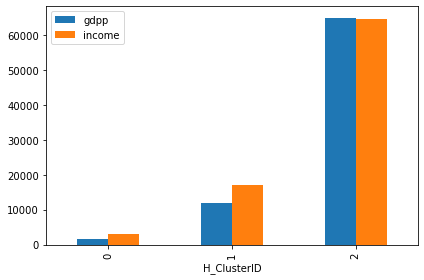

In [181]:
# Plot1 between income and gdpp against cluster_lables3
plt.figure (figsize = (15,10))

df_country_plot1 = df_country[['H_ClusterID', 'gdpp', 'income']].copy()
df_country_plot1 = df_country_plot1.groupby('H_ClusterID').mean()
df_country_plot1.plot.bar()

plt.tight_layout()
plt.show()

<Figure size 1080x720 with 0 Axes>

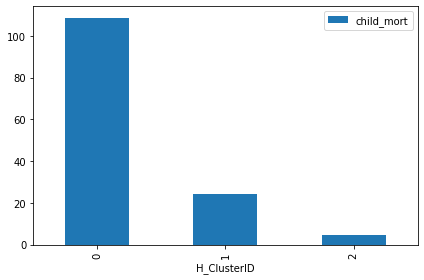

In [182]:
# Plot 2 between child_mort and cluster_labels

plt.figure (figsize = (15,10))

df_country_plot2 = df_country[['H_ClusterID', 'child_mort']].copy()
df_country_plot2 = df_country_plot2.groupby('H_ClusterID').mean()
df_country_plot2.plot.bar()

plt.tight_layout()
plt.show()

`Interpretation of Clusters`: 
- Cluster 0 has the Highest average Child Mortality rate of ~42 when compared to other 3 clusters, and Lowest average GDPP & Income of ~ 7551 & 12641 respectively. 
- All these figures clearly makes this cluster the best candidate for the financial aid from NGO. 
- We could also see that Cluster 1 comprises of ~89% of overall data, and has ~148 observations in comparision to 167 total observations This seems to be a problem. 
- This means that Hierarchical clustering is not giving us a good result as 89% of the data points are segmented into that cluster. 
- We also saw that increasing the cluster number is not solving this problem. We will perform K-Means Clustering and check how that turns out to be.

In [183]:
# Sort based on 'child_mort','income','gdpp' in respective order
H_cluster_Undeveloped = df_country[df_country['H_ClusterID']== 0]
H_top5 = H_cluster_Undeveloped.sort_values(by = ['gdpp','income','child_mort'],
                                                     ascending=[True, True, False]).head(5)

print( 'Top 5 countries dire need of aid  based on H cluster are:' , H_top5['country'].values )

Top 5 countries dire need of aid  based on H cluster are: ['Burundi' 'Liberia' 'Congo, Dem. Rep.' 'Niger' 'Sierra Leone']


From Hierarchical Clusturing we could get top 5 undeveloped countries are:
1. `'Burundi'` 
2. `'Liberia'`
3. `'Congo, Dem. Rep.'`
4. `'Niger'`
5. `'Sierra Leone'`

## Step 7: Clustering Model Selection

In [186]:
# Get the % of cluster distribution
H_cluster_per = df_country.H_ClusterID.value_counts(normalize = True)*100
print('Hierarchical Clustering Countries %:')
print(df_country.H_ClusterID.value_counts(normalize = True)*100)

K_cluster_per = df_country.KMean_clusterid.value_counts(normalize = True)*100
print('\nKMean Clustering Countries %:')
print(df_country.KMean_clusterid.value_counts(normalize = True)*100)

Hierarchical Clustering Countries %:
1   76.6467
0   17.9641
2   5.3892 
Name: H_ClusterID, dtype: float64

KMean Clustering Countries %:
0   55.6886
2   27.5449
1   16.7665
Name: KMean_clusterid, dtype: float64


`Insights`:
- The above data shows `KMean` is better clustered in terms of distribution of countries. 
- So we will be creating the final cluster with `KMean` cluster and doing profiling considering the labels accordingly.

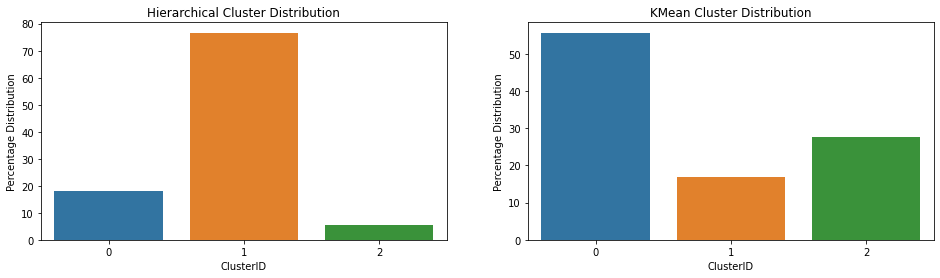

In [187]:
# barplot for cluster distribution
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.barplot(x= H_cluster_per.index, y = H_cluster_per)
plt.title('Hierarchical Cluster Distribution')
plt.xlabel('ClusterID')
plt.ylabel('Percentage Distribution')

plt.subplot(1,2,2)
sns.barplot(x= K_cluster_per.index, y = K_cluster_per)
plt.title('KMean Cluster Distribution')
plt.xlabel('ClusterID')
plt.ylabel('Percentage Distribution')
plt.show()

**Cluster Summary**

- From above analysis we could see KMean is having better distributed cluster. So we will select final model as KMean cluster and doing profiling considering the labels accordingly.
- Kindly note that both the model has resulted the same coutries as top 5 undeveloped countries.
- By comparing averages of K-means we can conclude that
    - Cluster 1 belongs to `Undeveloped` Countries,
    - Cluster 2 belongs to `Developed` Countries,
    - Cluster 0 belongs to `Developing` Countries.

To differentiate the clusters of developed countries from the clusters of under-developed countries, the notation can be changed and labeled as, {0: developed, 1:developing, 2: Undeveloped}.

In [188]:
# Final labels
df_country['ClusterLabels'] = df_country['KMean_clusterid'].map({0: 'Developed', 1:'Developing', 2: 'Undeveloped'})
df_country.head()                                                      

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMean_clusterid,H_ClusterID,ClusterLabels
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610,9.4400,56.2000,5.8200,553,2,0,Undeveloped
1,Albania,16.6000,1145.2000,267.8950,1987.7400,9930,4.4900,76.3000,1.6500,4090,0,1,Developed
2,Algeria,27.3000,1712.6400,185.9820,1400.4400,12900,16.1000,76.5000,2.8900,4460,0,1,Developed
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900,22.4000,60.1000,6.1600,3530,2,0,Undeveloped
4,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100,1.4400,76.8000,2.1300,12200,0,1,Developed


In [189]:
# Select final data frame for profiling
K_cluster = df_country[['country','gdpp','child_mort','income','ClusterLabels']]
K_cluster.head()

,country,gdpp,child_mort,income,ClusterLabels
0,Afghanistan,553,90.2000,1610,Undeveloped
1,Albania,4090,16.6000,9930,Developed
2,Algeria,4460,27.3000,12900,Developed
3,Angola,3530,119.0000,5900,Undeveloped
4,Antigua and Barbuda,12200,10.3000,19100,Developed


**Final Cluster:** 
- Based on the above interpretation of the cluster, we will now rename all the clusters accordingly. 
- The `Cluster 2` now becomes 'Undeveloped Countries', which will be of our interest.
- We will further analyse the Cluster 'Undeveloped Countries' and get to know various metrics of that data set, based on which   we could identify our final set of countries which needs the financial support from the NGO.

## Step 8: Analysing the 'Under Developed Countries (UDC)' Cluster

In [191]:
# Subset data frame based on undeveloped countries
K_cluster_UDC = K_cluster[K_cluster['ClusterLabels'] == 'Undeveloped']
K_cluster_UDC.head()

,country,gdpp,child_mort,income,ClusterLabels
0,Afghanistan,553,90.2000,1610,Undeveloped
3,Angola,3530,119.0000,5900,Undeveloped
17,Benin,758,111.0000,1820,Undeveloped
25,Burkina Faso,575,116.0000,1430,Undeveloped
26,Burundi,231,93.6000,764,Undeveloped


We wiil prioritize the soft features on the order of gdpp, income and child_mort with below understanding,
 - `gdpp` and `income` are highly `+ve` correlated.
 - `gdpp` and `income` both have `-ve` correlation with `child_mort`.
 -  Financial aid will directly improve `gdpp` and `income` and thus `child_mort` can be reduced.

In [192]:
# Sort based on 'child_mort','income','gdpp' in respective order
K_top5=K_cluster_UDC.sort_values(by = ['gdpp','income', 'child_mort']).head(5).copy()

K_top5 = K_top5[['country','gdpp','income', 'child_mort']]

# Final country list
K_top5

,country,gdpp,income,child_mort
26,Burundi,231,764,93.6000
88,Liberia,327,700,89.3000
37,"Congo, Dem. Rep.",334,609,116.0000
112,Niger,348,814,123.0000
132,Sierra Leone,399,1220,160.0000


`INSIGHT`:
- Countries (5 most) in dire need of aid are: `['Burundi' 'Liberia' 'Congo, Dem. Rep.' 'Niger' 'Sierra Leone']`.

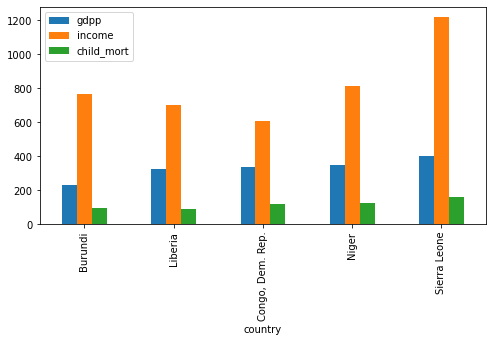

In [193]:
# Plot for final top5 countries based on child_nort, gdpp and income

KMean_plot = K_top5.set_index('country')
KMean_plot.plot.bar(figsize = (8,4))

plt.show()

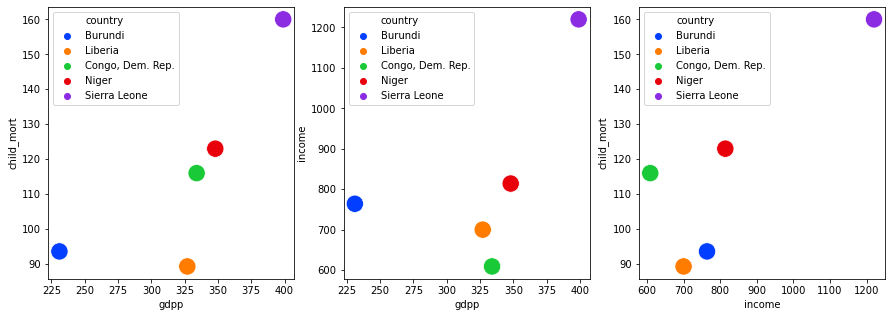

In [194]:
# Bivariate Analysis of Cluster 'Under_Developed_Countries' (recommended 5)

# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='country',
                data=K_top5, legend='full', palette="bright", s=300, c='lightblue')
plt.subplot(1, 3, 2)
sns.scatterplot(x='gdpp', y='income', hue='country',
                data=K_top5, legend='full', palette="bright", s=300, c='lightblue')
plt.subplot(1, 3, 3)
sns.scatterplot(x='income', y='child_mort', hue='country',
                data=K_top5, legend='full', palette="bright", s=300, c='lightblue')
plt.show()

In [195]:
# Descriptive Statistics
K_top5.describe()

,gdpp,income,child_mort
count,5.0000,5.0000,5.0000
mean,327.8000,821.4000,116.3800
std,61.0057,235.6285,28.2795
min,231.0000,609.0000,89.3000
25%,327.0000,700.0000,93.6000
50%,334.0000,764.0000,116.0000
75%,348.0000,814.0000,123.0000
max,399.0000,1220.0000,160.0000


## Step 9: Conclusion

In [197]:
#TOP 5 COUNTRIES recommended for Financial bases on KMean Clustering analysis
print( 'Top 5 countries dire need of aid:' , K_top5['country'].values )

Top 5 countries dire need of aid: ['Burundi' 'Liberia' 'Congo, Dem. Rep.' 'Niger' 'Sierra Leone']


**Final Result**:-

- Performed CLUSTERING on the socio-economic data provided for various countries to identify countries to recommend for Financial Aid from the NGO. 
- Based on our Clustering Analysis, I have identified the top countries under our 'Undeveloped Countries' cluster which are in dire need of the Financial Aid. This output is purely based on the dataset we used and various analytical methodology we performed.

**Finanical Aid required countries on priority bases:**
<font color = 'Red'> 
1. Burundi
2. Liberia
3. Congo, Dem. Rep.
4. Niger
5. Sierra Leone 
<font>